In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Read in the data
df = pd.read_csv('GlobalWeatherRepository.csv')



2023-12-01 10:44:23.827348: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-01 10:44:23.831147: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 10:44:23.882967: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 10:44:23.883049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 10:44:23.884764: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

# DATA PREPROCESSING

In [4]:
# let print the first 5 rows of the data
df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93


In [5]:
# print the columns of the data and the numner of columns
print (f"{df.columns}, \n\nNumber of attributes: {len(df.columns)}")

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object'), 

Number of attributes: 41


In [6]:
# lets check if there are missing values in the data

print (f"Number of missing values in the data: {df.isnull().sum().sum()}")

# lets check the data types of the attributes 

print (f"Data types of the attributes: \n{df.dtypes}")

Number of missing values in the data: 0
Data types of the attributes: 
country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibilit

In [7]:
# for each attribute, lets check the number of unique values

print (f"Number of unique values in each attribute: \n{df.nunique()}")

Number of unique values in each attribute: 
country                          185
location_name                    197
latitude                         193
longitude                        194
timezone                         183
last_updated_epoch               137
last_updated                    2586
temperature_celsius              480
temperature_fahrenheit           762
condition_text                    35
wind_mph                         132
wind_kph                         132
wind_degree                      360
wind_direction                    16
pressure_mb                       74
pressure_in                      163
precip_mm                        366
precip_in                         50
humidity                          96
cloud                            101
feels_like_celsius               685
feels_like_fahrenheit           1105
visibility_km                     64
visibility_miles                  13
uv_index                          11
gust_mph                       

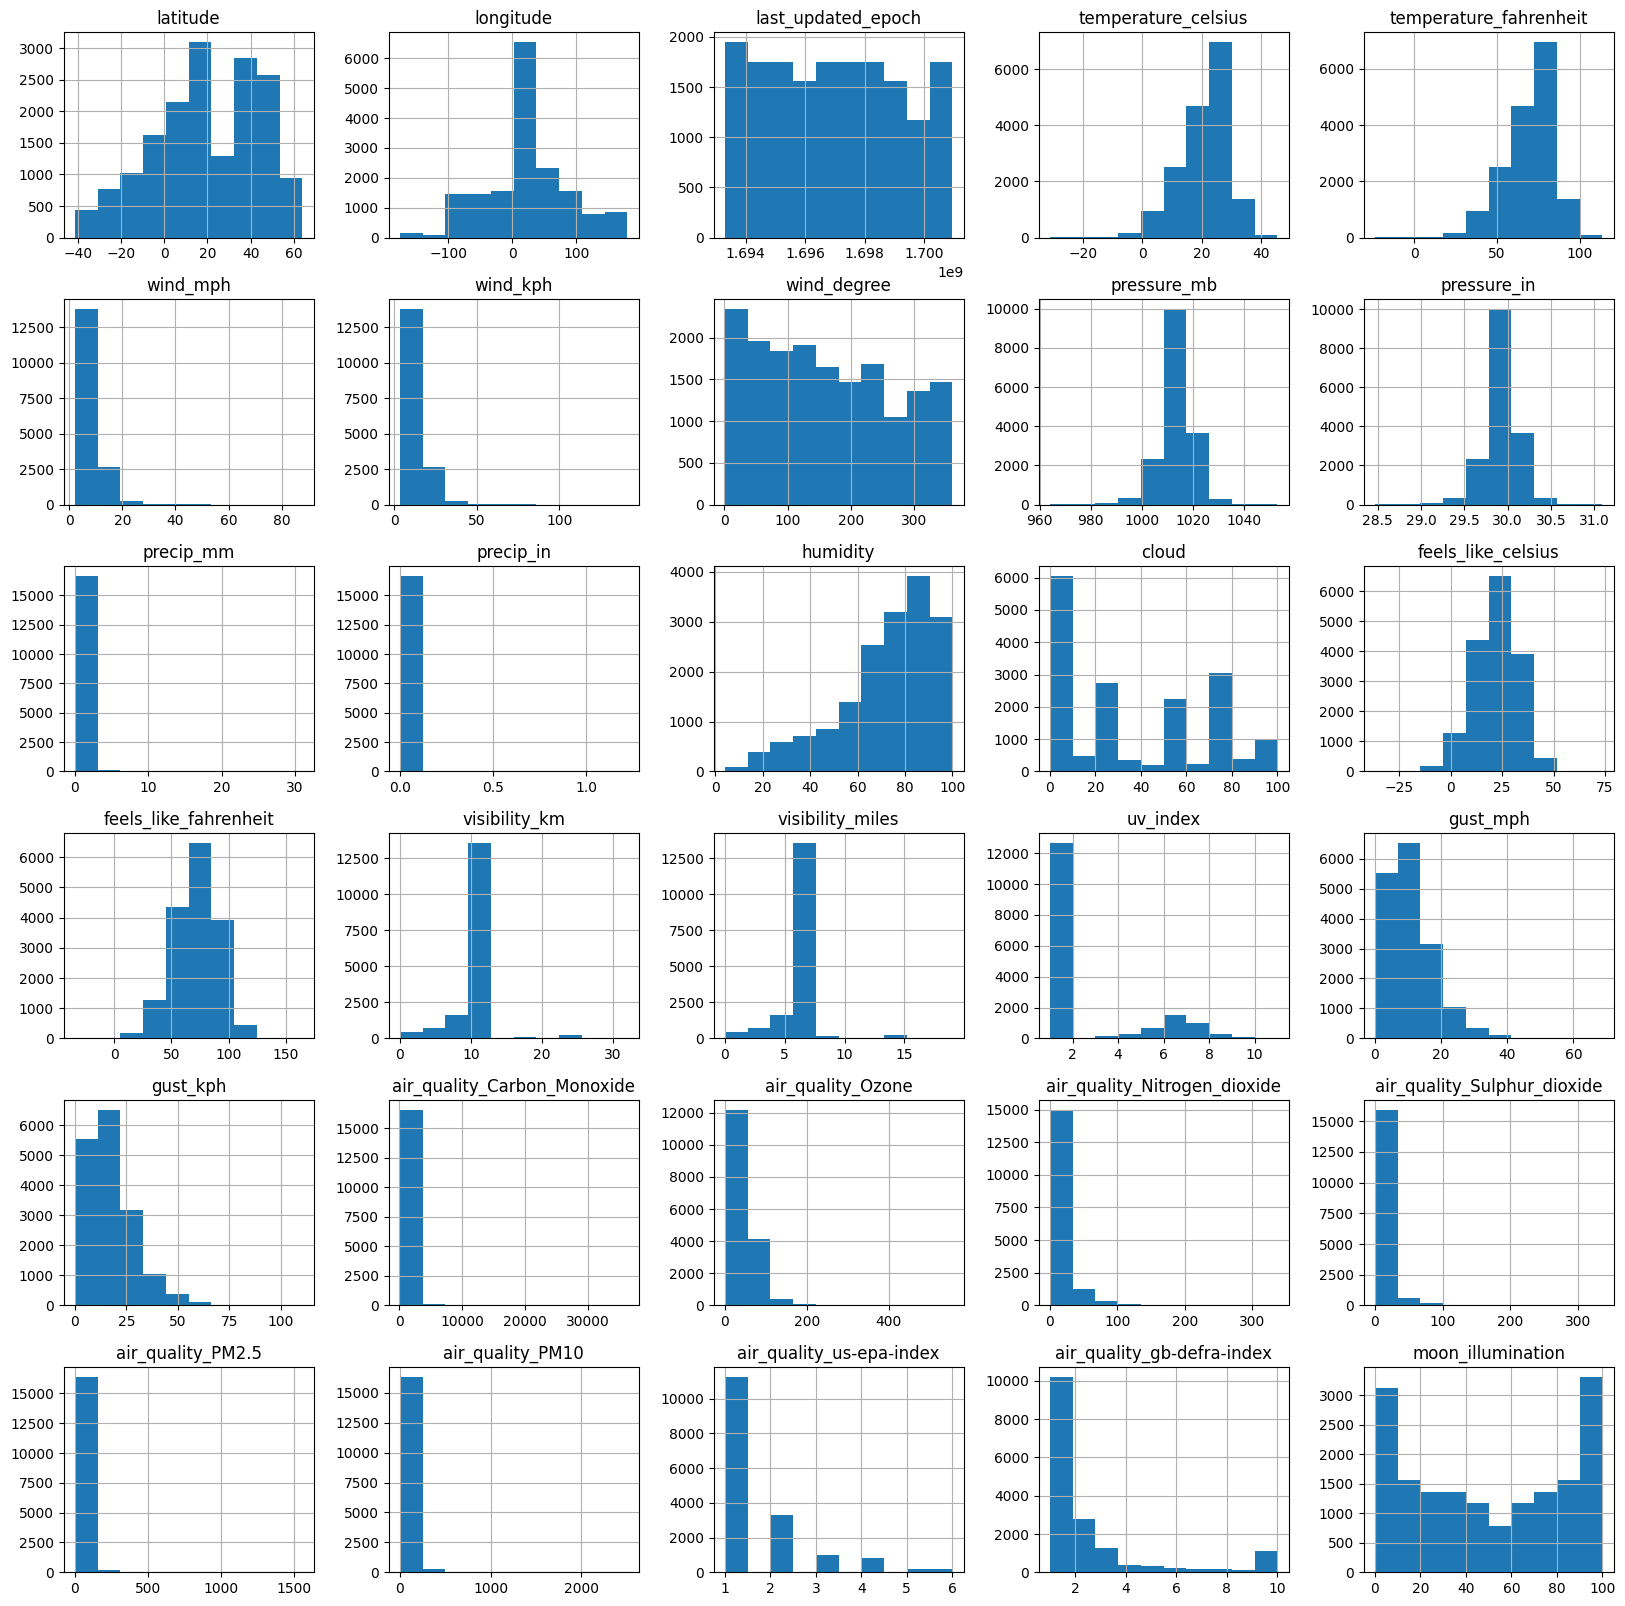

In [8]:
#  The values that we wish to predict are temperature_celcius,  wind_kph, humidity, pressure_mb, precip_mm, and cloud.

# lets check the distribution of the values in the attributes

df.hist(figsize=(20,20))
plt.show()



In [10]:

target_variables = ['temperature_celsius', 'wind_kph', 'humidity', 'pressure_mb', 'precip_mm', 'cloud']
# ADD to see also condition_text
corr_matrix = df[target_variables].corr()


sorted_correls = {}

for variable in target_variables:
    sorted_correls[variable] = corr_matrix[variable].sort_values(ascending=False)

for variable in target_variables:
    print(f"Correlation for {variable}:\n{sorted_correls[variable]}\n\n")

Correlation for temperature_celsius:
temperature_celsius    1.000000
precip_mm              0.053560
wind_kph               0.031068
cloud                 -0.012460
humidity              -0.241937
pressure_mb           -0.287674
Name: temperature_celsius, dtype: float64


Correlation for wind_kph:
wind_kph               1.000000
cloud                  0.156392
precip_mm              0.034833
temperature_celsius    0.031068
humidity              -0.084843
pressure_mb           -0.206277
Name: wind_kph, dtype: float64


Correlation for humidity:
humidity               1.000000
cloud                  0.377334
precip_mm              0.125638
pressure_mb           -0.045265
wind_kph              -0.084843
temperature_celsius   -0.241937
Name: humidity, dtype: float64


Correlation for pressure_mb:
pressure_mb            1.000000
humidity              -0.045265
precip_mm             -0.088785
cloud                 -0.179524
wind_kph              -0.206277
temperature_celsius   -0.287674
Name

In [11]:
def corr_filter(df, umbral=0.9):
    # We will filter only numeric columns
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    
    # Calculate correlation matrix
    corrmat = df[numeric_columns].corr()
    
    # Lets obtain the correlation pairs
    corr_pairs = corrmat.unstack().sort_values(ascending=False).drop_duplicates()
    high_corr_pairs = corr_pairs[(corr_pairs > umbral) & (corr_pairs < 1)]
    print (f"Correlation pairs:\n{high_corr_pairs}\n\n")

    return None




In [12]:
corr_filter(df, umbral=0.95)


# running this we can see that there is high correlation 
# between for those attributes which essentially are the same but with different units of measurement
# for example, temperature_celsius and temperature_fahrenheit, and wind_kph and wind_mph

Correlation pairs:
temperature_fahrenheit  temperature_celsius       0.999998
feels_like_fahrenheit   feels_like_celsius        0.999996
gust_kph                gust_mph                  0.999988
wind_mph                wind_kph                  0.999966
pressure_mb             pressure_in               0.999577
precip_in               precip_mm                 0.998893
visibility_km           visibility_miles          0.991463
feels_like_celsius      temperature_celsius       0.978807
feels_like_fahrenheit   temperature_celsius       0.978805
feels_like_celsius      temperature_fahrenheit    0.978802
feels_like_fahrenheit   temperature_fahrenheit    0.978801
dtype: float64




In [13]:
# lets manually drop the attributes that are highly correlated. We will 
# keep those attributes that are in the units of measurement that we are interested in
# the only attribute highly correlated that

# Initially, we will keep feels_like_celcius, we will test it and then we will drop it if it is not useful 
columns_to_drop = ['temperature_fahrenheit', 'wind_mph', 'pressure_in', 'precip_in', 'gust_mph', 'feels_like_fahrenheit', 'visibility_miles', 'air_quality_us-epa-index']

new_df = df.drop(columns=columns_to_drop).copy()
corr_filter(new_df, umbral=0.95)

Correlation pairs:
feels_like_celsius  temperature_celsius    0.978807
dtype: float64




In [14]:
# Now, we will change the column last_updated to eliminate the time and keep only the date

new_df['last_updated'] = pd.to_datetime(new_df['last_updated']).dt.floor('D')



In [ ]:
# Finally, we have to deal with categorical variables. We will use one-hot encoding to transform them into numerical values

# first, lets check the categorical variables

categorical_variables = new_df.select_dtypes(include=['object']).columns

categorical_variables





Index(['country', 'location_name', 'timezone', 'condition_text',
       'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset',
       'moon_phase'],
      dtype='object')

In [ ]:
# We will discard country, as location is unique already
# We will take out timezone also since it will be constant all the time for a given location

new_df.columns
new_df = new_df.drop(columns=['country', 'timezone', 'latitude', 'longitude', 'last_updated_epoch']).copy()

# we will not eliminate location_name, as it is the only way to identify the location
# for the rest of the categorical variables, we will use one-hot encoding

categorical_variables = new_df.select_dtypes(include=['object']).columns

# we remove location_name from the list of categorical variables
categorical_variables = categorical_variables.drop('location_name')

# we will also remove sunrise, sunset, moonrise and moonset from one hot enconding as they are time values
categorical_variables = categorical_variables.drop(['sunrise', 'sunset', 'moonrise', 'moonset'])


new_df = pd.get_dummies(new_df, columns=categorical_variables)


# TRYING TO SPLIT

In [2]:
from adjust_dataset import adjust_dataset

df = pd.read_csv('docs/data/GlobalWeatherRepository.csv')

df = adjust_dataset(df, 'Madrid')




/mnt/c/Users/marke/Desktop/ERASMUS/ASIGNATURAS/IoT/IoT_project/adjust_dataset.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunrise'] = pd.to_datetime(df['sunrise'])
/mnt/c/Users/marke/Desktop/ERASMUS/ASIGNATURAS/IoT/IoT_project/adjust_dataset.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunset'] = pd.to_datetime(df['sunset'])
/mnt/c/Users/marke/Desktop/ERASMUS/ASIGNATURAS/IoT/IoT_project/adjust_dataset.py:49: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['moonrise'] = pd.to_datetime(df['moonrise'])
/mnt/c/Users/marke/Desktop/ERASMUS/ASIGNATURAS/Io

In [3]:
# Next, we will split the data into training and test sets
# Bare in mind it is important TO NOT shuffle the data, as we are dealing with time series data

# we will use 70% of the data for training and 30% for testing

train_size = int(len(df) * 0.7)

train_df = df[:train_size]
test_df = df[train_size:]

print (f"Train size: {len(train_df)}")
print (f"Test size: {len(test_df)}")

Train size: 62
Test size: 27


In [4]:
# Now, lets declare X and y for training and testing

target_variables = ['temperature_celsius', 'wind_kph', 'humidity', 'pressure_mb', 'precip_mm', 'cloud', 'condition_text']


X_train = train_df.drop(columns=target_variables)
y_train = train_df[target_variables]

X_test = test_df.drop(columns=target_variables)
y_test = test_df[target_variables]

# Now, we will scale the data

scaler = StandardScaler()

# we will scale only numerical values

numerical_columns = X_train.select_dtypes(include=['int', 'float']).columns

scaler.fit(X_train[numerical_columns])

X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])



In [5]:

# see the data types
# X_train.dtypes

for datatype in X_train.columns:
    # lets see the unique values for each attribute
    print (f"Data type: {datatype}")
    print (f"Unique values: {X_train[datatype].unique()}")
    print ("\n")

Data type: wind_degree
Unique values: [ 0.35448638 -0.9972815  -1.12450671 -0.83029841 -1.39486029 -0.67921847
  1.38819122 -1.23582877 -1.07679726  0.67254941 -0.75873423 -0.83824999
  0.41014741 -0.36115544 -1.15631302  0.59303365 -1.03703938  1.30867547
 -0.63946059 -1.13245829  1.22915971  1.14964395  0.0205202  -0.2100755
  0.75206516 -0.52018696  0.03642335  0.27497062  0.51351789 -0.4406712
  0.43400213  0.19545486 -0.12260817  0.30677692]


Data type: feels_like_celsius
Unique values: [ 0.36266505 -0.05257471  0.57028493  0.98552469  1.38000247 -0.46781447
 -0.26019459  0.15504517  1.40076445  1.33847849  1.54609837 -0.92457821
 -0.50933845 -0.86229225  1.06857264  0.90247674  1.17238258  1.02704867
  1.08933463  1.04781066  1.00628668 -1.79658171 -2.00420159 -1.36057996
 -2.3363934  -1.85886767 -2.02496358 -1.00762616 -1.17372207 -1.50591388
 -1.298294   -1.27753201 -2.12877352]


Data type: visibility_km
Unique values: [ 0.35381519 -1.33361108 -0.48989795 -3.86475048 -2.17732

In [5]:
# Lets build the model
# We will use a simple neural network with 3 layers and a sliding window of 7 days and 3 days as output


# We will use a sliding window of 7 days and 3 days as output
window_size = 7
output_size = 3

# Create empty lists to store input and output pairs
X_train_windows = []
y_train_windows = []

# before, we will change the date type of last updated as it is not supported by tensorflow


for i in range(len(X_train) - window_size - output_size + 1):
    X_train_window = X_train.iloc[i:i+window_size]  # Assuming X_train is a DataFrame
    y_train_window = y_train.iloc[i+window_size:i+window_size+output_size]  # Assuming y_train is a DataFrame

    X_train_windows.append(X_train_window.values)
    y_train_windows.append(y_train_window.values)

X_train_windows = np.array(X_train_windows)
y_train_windows = np.array(y_train_windows)

model = Sequential()
model.add(Dense(64, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.add(Dense(units=output_size, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_windows, y_train_windows, epochs=100, verbose=0)

2023-12-01 10:43:49.241095: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-01 10:43:49.241937: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).